In [1]:
import cv2

In [2]:
img2 = cv2.imread('images/type_of_kernels.png')

In [3]:
print(img2.shape)

(704, 1214, 3)


In [4]:
# cv2.imshow("Display window", img)
# this doesn't works here, not know the reason exactly but it's not meant to work here

(np.float64(-0.5), np.float64(1213.5), np.float64(703.5), np.float64(-0.5))

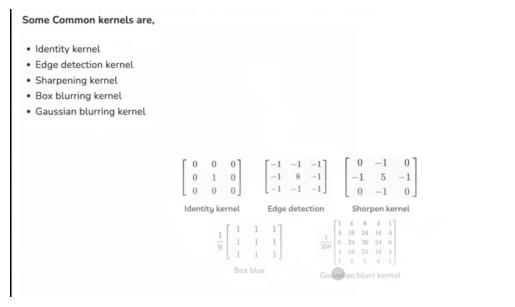

In [5]:
import matplotlib.pyplot as plt

# Convert BGR (OpenCV) to RGB (Matplotlib)
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')

In [6]:
import numpy as np

In [7]:
img_path='images/dogo_img.jpg'

In [8]:
img = cv2.imread(img_path , cv2.IMREAD_GRAYSCALE)

(<matplotlib.image.AxesImage at 0x259e5915280>, (420, 420))

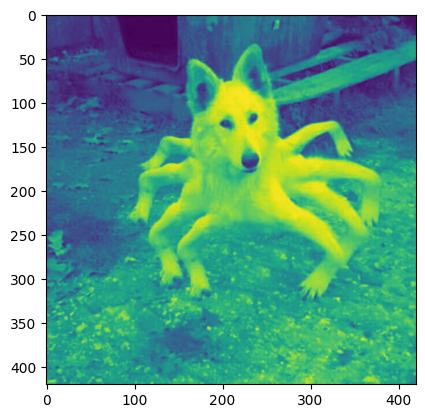

In [9]:
plt.imshow(img),img.shape

In [10]:
sobel_vertical =np.array([[1,0,-1],
                          [2,0,-2],
                          [1,0,-1]])

In [11]:
rows,cols=img.shape
k_rows,k_cols=sobel_vertical.shape

In [12]:
output_matrix=np.zeros((rows-k_rows+1,cols-k_cols+1))
output_matrix,output_matrix.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (418, 418))

In [13]:
# convolution funtion

for i in range(1,rows-1):
    for j in range(1,cols-1):
        region = img[i-1:i+2,j-1:j+2]
        output_matrix[i-1,j-1] = np.sum(region * sobel_vertical )

# not that effective result

In [14]:
print(output_matrix)

[[  -3.   -2.    3. ...   -5.    0.    0.]
 [  -2.   -2.    1. ...   -8.    0.    0.]
 [  -3.   -3.   -1. ...   -5.    0.    0.]
 ...
 [ -94. -118.  -86. ...    4.   -5.    7.]
 [ -61.  -84.  -60. ...   16.    1.    2.]
 [  -1.   -7.   12. ...    4.    0.    3.]]


In [15]:
output_matrix = np.clip(output_matrix, 0, 255)
output_matrix = output_matrix.astype(np.uint8)

(418, 418)


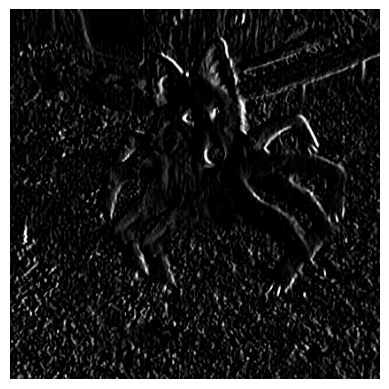

In [16]:
plt.imshow(output_matrix,cmap='gray')
plt.axis('off')
print(output_matrix.shape)

In [17]:
sobel_output = cv2.filter2D(img,-1,sobel_vertical)
sobel_output.shape

(420, 420)

(np.float64(-0.5), np.float64(419.5), np.float64(419.5), np.float64(-0.5))

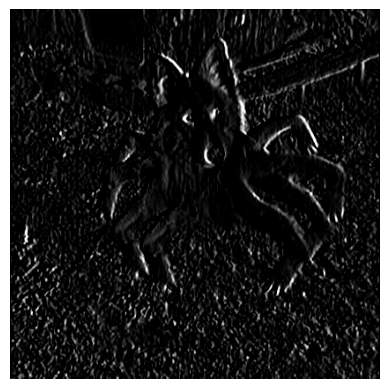

In [18]:
plt.imshow(sobel_output,cmap='gray')
plt.axis('off')

In [19]:
sobel_output_again = cv2.filter2D(sobel_output,-1,sobel_vertical)
sobel_output_again.shape

(420, 420)

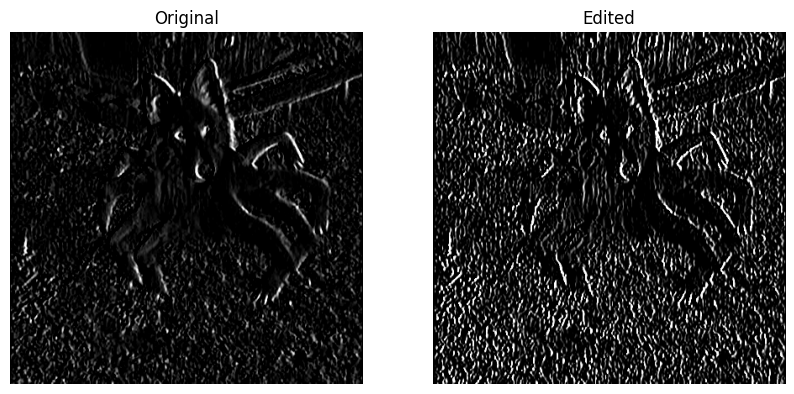

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(sobel_output,cmap='gray')
plt.title('Original')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(sobel_output_again,cmap='gray')
plt.title('Edited')
plt.axis('off')

plt.show()

In [21]:
sobel_output_hz = cv2.filter2D(img,-1,sobel_vertical.T)
sobel_output_hz.shape

(420, 420)

(np.float64(-0.5), np.float64(419.5), np.float64(419.5), np.float64(-0.5))

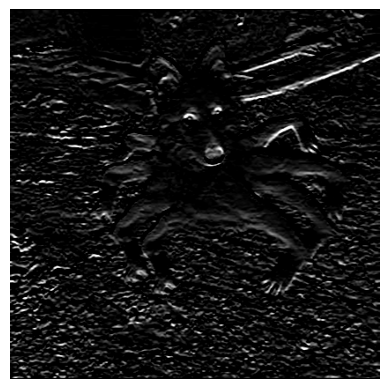

In [22]:
plt.imshow(sobel_output_hz,cmap='gray')
plt.axis('off')

In [26]:
sobel_output_again_hz = cv2.filter2D(sobel_output_hz,-1,sobel_vertical)
sobel_output_again_hz.shape

(420, 420)

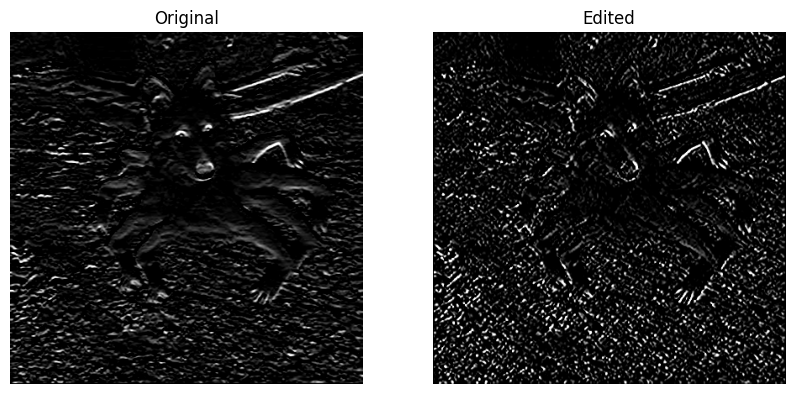

In [27]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(sobel_output_hz,cmap='gray')
plt.title('Original')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(sobel_output_again_hz,cmap='gray')
plt.title('Edited')
plt.axis('off')

plt.show()

In [23]:
#it is basically blurring
#  new = np.array([[1/9,1/9,1/9],
#                [1/9,1/9,1/9],
#                [1/9,1/9,1/9]])

# it is sharpening or i'd say increasing brightness
new = np.array([[0,-1,0],
               [-1,5,-1],
               [0,-1,0]])

In [24]:
new_output = cv2.filter2D(img,-1,new*1.5)

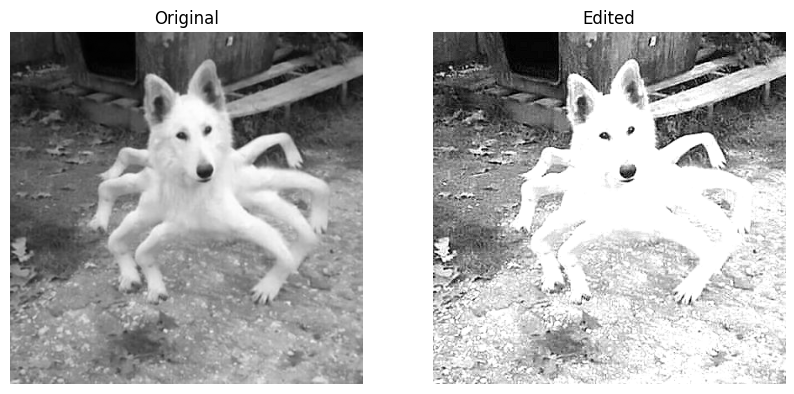

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(new_output,cmap='gray')
plt.title('Edited')
plt.axis('off')

plt.show()